# Why Is Rebalancing Important? (2019)

Exploring flow of bikes into and out of a station

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tkr

sys.path.insert(0, "..")
import helpers

pd.set_option("display.max_columns", None)

In [ ]:
DATA_DIR = "../data/"
WEATHER_DIR = DATA_DIR + "weather/"

In [ ]:
# import & convert dates
trips = helpers.get_trips(2019, DATA_DIR)
col_types = {'starttime':'datetime64','stoptime':'datetime64'}
trips = trips.astype(col_types)

trips.head()

,tripduration,starttime,stoptime,startstationid,endstationid,bikeid,usertype,birthyear,gender
0,320,2019-01-01 00:01:47.401,2019-01-01 00:07:07.581,3160,3283,15839,Subscriber,1971,1
1,316,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,519,518,32723,Subscriber,1964,1
2,591,2019-01-01 00:06:03.997,2019-01-01 00:15:55.438,3171,3154,27451,Subscriber,1987,1
3,2719,2019-01-01 00:07:03.545,2019-01-01 00:52:22.650,504,3709,21579,Subscriber,1990,1
4,303,2019-01-01 00:07:35.945,2019-01-01 00:12:39.502,229,503,35379,Subscriber,1979,1


In [ ]:
# feature creation
trips['date'] = pd.DatetimeIndex(trips['starttime']).date
trips['hour'] = pd.DatetimeIndex(trips['starttime']).hour
trips['minute'] = pd.DatetimeIndex(trips['starttime']).minute
trips['MoD'] = trips.hour*60 + trips.minute

trips.head()


,tripduration,starttime,stoptime,startstationid,endstationid,bikeid,usertype,birthyear,gender,date,hour,minute,MoD
0,320,2019-01-01 00:01:47.401,2019-01-01 00:07:07.581,3160,3283,15839,Subscriber,1971,1,2019-01-01,0,1,1
1,316,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,519,518,32723,Subscriber,1964,1,2019-01-01,0,4,4
2,591,2019-01-01 00:06:03.997,2019-01-01 00:15:55.438,3171,3154,27451,Subscriber,1987,1,2019-01-01,0,6,6
3,2719,2019-01-01 00:07:03.545,2019-01-01 00:52:22.650,504,3709,21579,Subscriber,1990,1,2019-01-01,0,7,7
4,303,2019-01-01 00:07:35.945,2019-01-01 00:12:39.502,229,503,35379,Subscriber,1979,1,2019-01-01,0,7,7


# Identify Bike Flow For Most Popular Station

### Bike Flow by Hour - Out

In [ ]:
#identify days/stations with most rides OUT
out_counts = trips.groupby(['date','startstationid'])['bikeid'].agg(['count','nunique']).reset_index().sort_values(by='count',ascending=False)
out_counts.head(20)

,date,startstationid,count,nunique
175260,2019-08-17,491,1174,963
169758,2019-08-10,491,988,824
193333,2019-09-09,519,864,805
164273,2019-08-03,491,850,713
156491,2019-07-24,519,848,779
205079,2019-09-24,519,828,773
194120,2019-09-10,519,825,751
145596,2019-07-10,519,820,754
217733,2019-10-10,519,815,753
157270,2019-07-25,519,814,734


In [ ]:
out = trips.loc[(trips.date.astype(str)=='2019-09-09') & (trips.startstationid==491)]
out

,tripduration,starttime,stoptime,startstationid,endstationid,bikeid,usertype,birthyear,gender,date,hour,minute,MoD
16578989,1896,2019-09-09 00:36:44.226,2019-09-09 01:08:20.492,491,275,30830,Subscriber,1979,1,2019-09-09,0,36,36
16579014,631,2019-09-09 00:40:57.692,2019-09-09 00:51:29.228,491,462,26704,Subscriber,1986,1,2019-09-09,0,40,40
16579209,614,2019-09-09 01:11:15.957,2019-09-09 01:21:30.106,491,368,28164,Customer,1994,1,2019-09-09,1,11,71
16579242,1089,2019-09-09 01:21:15.651,2019-09-09 01:39:25.531,491,332,35048,Subscriber,1994,1,2019-09-09,1,21,81
16579841,668,2019-09-09 05:08:38.469,2019-09-09 05:19:46.807,491,456,17974,Subscriber,1992,1,2019-09-09,5,8,308
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16661806,208,2019-09-09 22:36:00.833,2019-09-09 22:39:29.579,491,285,38926,Subscriber,1962,1,2019-09-09,22,36,1356
16661946,385,2019-09-09 22:40:20.866,2019-09-09 22:46:46.152,491,536,15064,Subscriber,1957,1,2019-09-09,22,40,1360
16662084,993,2019-09-09 22:45:19.425,2019-09-09 23:01:53.404,491,3459,28964,Subscriber,1995,1,2019-09-09,22,45,1365
16662112,1366,2019-09-09 22:46:08.392,2019-09-09 23:08:54.959,491,460,31128,Subscriber,1995,1,2019-09-09,22,46,1366


In [ ]:
top_out = out.groupby('hour')['bikeid'].agg(['count','nunique']).reset_index().sort_values(by='hour')
top_out.rename(columns={'count':'count_out','nunique':'unique_out'},inplace=True)
top_out

,hour,count_out,unique_out
0,0,2,2
1,1,2,2
2,5,1,1
3,6,8,8
4,7,22,22
5,8,32,31
6,9,9,9
7,10,6,6
8,11,13,13
9,12,17,17


### Bike Flow By Hour - in

In [ ]:
into = trips.loc[(trips.date.astype(str)=='2019-09-09') & (trips.endstationid==491)]
into

,tripduration,starttime,stoptime,startstationid,endstationid,bikeid,usertype,birthyear,gender,date,hour,minute,MoD
16578831,553,2019-09-09 00:15:30.508,2019-09-09 00:24:44.165,462,491,26704,Subscriber,1986,1,2019-09-09,0,15,15
16579618,142,2019-09-09 03:34:45.312,2019-09-09 03:37:07.365,325,491,34845,Subscriber,1969,0,2019-09-09,3,34,214
16579633,299,2019-09-09 03:44:19.157,2019-09-09 03:49:18.658,453,491,33966,Subscriber,1986,1,2019-09-09,3,44,224
16579790,317,2019-09-09 04:55:58.135,2019-09-09 05:01:15.862,379,491,17974,Subscriber,1959,1,2019-09-09,4,55,295
16579798,367,2019-09-09 04:57:46.283,2019-09-09 05:03:53.510,492,491,25682,Subscriber,1965,1,2019-09-09,4,57,297
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16660848,430,2019-09-09 22:06:54.072,2019-09-09 22:14:04.787,509,491,30228,Subscriber,1973,1,2019-09-09,22,6,1326
16660932,293,2019-09-09 22:09:39.186,2019-09-09 22:14:32.973,293,491,15127,Subscriber,1999,1,2019-09-09,22,9,1329
16661031,1158,2019-09-09 22:12:11.650,2019-09-09 22:31:29.985,285,491,38926,Subscriber,1980,2,2019-09-09,22,12,1332
16661317,374,2019-09-09 22:20:06.544,2019-09-09 22:26:21.391,442,491,28964,Subscriber,1963,1,2019-09-09,22,20,1340


In [ ]:
top_into = into.groupby('hour')['bikeid'].agg(['count','nunique']).reset_index().sort_values(by='hour')
top_into.rename(columns={'count':'count_in','nunique':'unique_in'},inplace=True)
top_into

,hour,count_in,unique_in
0,0,1,1
1,3,2,2
2,4,2,2
3,5,10,10
4,6,31,31
5,7,54,54
6,8,82,80
7,9,69,69
8,10,20,20
9,11,14,14


### Determine and Visualize Overall Flow

In [ ]:
top_flow = top_out.merge(top_into,how='outer',on='hour')
top_flow.fillna(value=0,inplace=True)
top_flow['change'] = top_flow.count_out - top_flow.count_in
top_flow['cum_change'] = top_flow.change.cumsum()
top_flow

,hour,count_out,unique_out,count_in,unique_in,change,cum_change
0,0,2.0,2.0,1.0,1.0,1.0,1.0
1,1,2.0,2.0,0.0,0.0,2.0,3.0
2,5,1.0,1.0,10.0,10.0,-9.0,-6.0
3,6,8.0,8.0,31.0,31.0,-23.0,-29.0
4,7,22.0,22.0,54.0,54.0,-32.0,-61.0
5,8,32.0,31.0,82.0,80.0,-50.0,-111.0
6,9,9.0,9.0,69.0,69.0,-60.0,-171.0
7,10,6.0,6.0,20.0,20.0,-14.0,-185.0
8,11,13.0,13.0,14.0,14.0,-1.0,-186.0
9,12,17.0,17.0,25.0,25.0,-8.0,-194.0


([<matplotlib.axis.XTick at 0x7faf141049a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

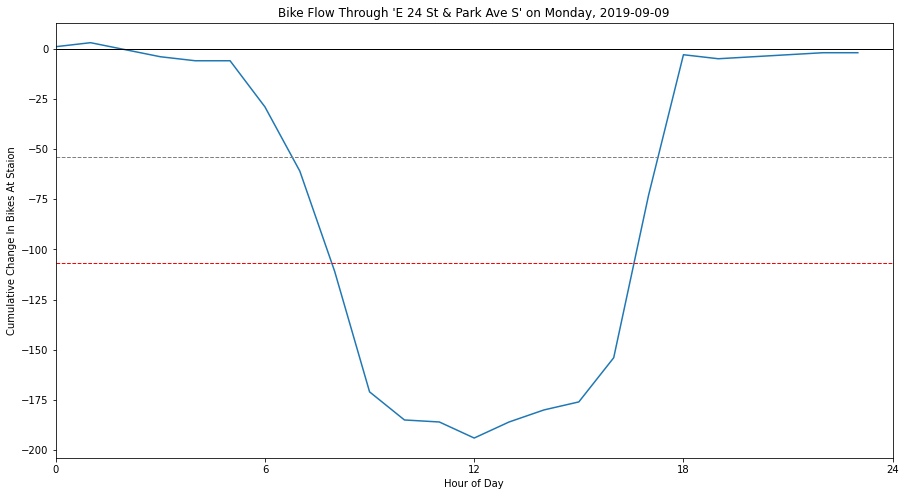

In [ ]:
plt.figure(figsize=(15, 8))
x = sns.lineplot(x=top_flow.hour,y=top_flow.cum_change)
plt.axhline(0,c='black',lw=1)
plt.axhline(-107,c='red',lw=1,ls='--')
plt.axhline(-54,c='gray',lw=1,ls='--')
x.set(ylabel='Cumulative Change In Bikes At Staion',xlabel='Hour of Day',title="Bike Flow Through 'E 24 St & Park Ave S' on Monday, 2019-09-09",xlim=(0,24))
plt.xticks([0,6,12,18,24])

In [ ]:
stations = pd.read_parquet('../data/stations/stations.parquet')
stations.loc[stations.stationid==491]

,stationid,stationname,latitude,longitude,capacity,neighbourhood,boro,zipcode,elevation_ft
2,491.0,E 24 St & Park Ave S,40.740964,-73.986022,NaN,Manhattan Community Board 5,Manhattan,10010,34.87


#### 2019 capacities are not available, estimating based on those that are

In [ ]:
stations.capacity.mean()

32.50743801652892

In [ ]:
stations.capacity.median()

27.0

In [ ]:
stations.capacity.max()

107.0

In [ ]:
stations.capacity.quantile(q=.9)

54.0

#### How to Identify A Rebalance

In [ ]:
trips.head()

,tripduration,starttime,stoptime,startstationid,endstationid,bikeid,usertype,birthyear,gender,date,hour,minute,MoD
0,320,2019-01-01 00:01:47.401,2019-01-01 00:07:07.581,3160,3283,15839,Subscriber,1971,1,2019-01-01,0,1,1
1,316,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,519,518,32723,Subscriber,1964,1,2019-01-01,0,4,4
2,591,2019-01-01 00:06:03.997,2019-01-01 00:15:55.438,3171,3154,27451,Subscriber,1987,1,2019-01-01,0,6,6
3,2719,2019-01-01 00:07:03.545,2019-01-01 00:52:22.650,504,3709,21579,Subscriber,1990,1,2019-01-01,0,7,7
4,303,2019-01-01 00:07:35.945,2019-01-01 00:12:39.502,229,503,35379,Subscriber,1979,1,2019-01-01,0,7,7


In [ ]:
trips.sort_values(by=['bikeid','starttime'])[['starttime','stoptime','startstationid','endstationid','bikeid']]

,starttime,stoptime,startstationid,endstationid,bikeid
577407,2019-01-17 17:36:26.957,2019-01-17 17:48:45.528,2005,120,14529
646437,2019-01-19 20:15:20.299,2019-01-19 20:22:01.710,120,3057,14529
648077,2019-01-20 09:55:21.158,2019-01-20 10:01:22.824,3057,344,14529
652716,2019-01-20 13:53:00.088,2019-01-20 14:00:13.861,344,3052,14529
663169,2019-01-21 09:24:23.890,2019-01-21 09:29:47.381,3052,3042,14529
...,...,...,...,...,...
4295134,2019-12-29 14:20:44.102,2019-12-29 14:43:52.456,2006,3518,42046
4297208,2019-12-29 15:29:56.124,2019-12-29 15:47:50.336,3518,3312,42046
19427863,2019-10-14 15:33:38.337,2019-10-14 15:57:04.047,3453,285,42068
20283001,2019-10-27 14:41:16.275,2019-10-27 14:44:29.585,285,335,42068


In [ ]:
offset = pd.DataFrame(
    {
        "starttime": pd.to_datetime("2010-09-01"),
        "startstationid": 0,
        "stoptime": pd.to_datetime("2010-09-01"),
        "endstationid": 0,
        "bikeid": 0,
    },
    index=[0],
)

trips1 = (
        pd.concat([offset, trips])
        .reset_index(drop=True)
        .rename(columns={"bikeid": "bikeid1"})
    )


trips2 = (
        pd.concat([trips, offset])
        .reset_index(drop=True)
        .rename(columns={"bikeid": "bikeid2"})
    )

    # concat horizontally - a ride would start from the same endstation unless rebalanced
rebal = pd.concat(
        [
            trips1[["bikeid1", "stoptime", "endstationid"]],
            trips2[["bikeid2", "starttime", "startstationid"]],
        ],
        axis=1,
    )

rebal = rebal.loc[
        (rebal.bikeid1 == rebal.bikeid2) & (rebal.startstationid != rebal.endstationid)
    ]

In [ ]:
rebal.head(10)

,bikeid1,stoptime,endstationid,bikeid2,starttime,startstationid
142964,18773,2019-01-04 21:27:43.127,461,18773,2019-01-04 13:42:09.015,3166
5203573,37092,2019-03-22 22:24:22.660,285,37092,2019-03-22 22:27:26.799,483
5305221,36967,2019-03-25 09:29:11.527,127,36967,2019-03-25 08:59:41.261,522
5321017,37792,2019-03-25 16:16:17.981,3598,37792,2019-03-25 15:44:36.820,522
5369523,35905,2019-03-26 14:06:44.786,461,35905,2019-03-26 13:22:32.504,497
